# Importamos la libreria Pandas

In [1]:
import pandas as pd

### 1. Cargue en un Dataframe los datos de los accidentes de los últimos 3 años

In [2]:
pd.set_option('display.max_columns', 0)
pd.set_option('display.width', 1000)


atus2021 = pd.read_csv("./atus_anual_csv/conjunto_de_datos/atus_anual_2021.csv", index_col=False)
atus2022 = pd.read_csv("./atus_anual_csv/conjunto_de_datos/atus_anual_2022.csv", index_col=False)
atus2023 = pd.read_csv("./atus_anual_csv/conjunto_de_datos/atus_anual_2023.csv", index_col=False)

dataset = pd.concat([atus2021, atus2022, atus2023])

### 2. Agregue una columna tipo date formada por los valores de las columnas correspondientes a Año, Mes, Dia, Hora y Minuto.

In [3]:
dataset.insert(3, 'DATE', dataset['ANIO'].astype(str) + '-' 
               + dataset['MES'].astype(str).str.zfill(2) + '-' 
               + dataset['ID_DIA'].astype(str).str.zfill(2) + ' ' 
               + dataset['ID_HORA'].astype(str).str.zfill(2) + ':' 
               + dataset['ID_MINUTO'].astype(str).str.zfill(2))

dataset

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,DATE,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
396624,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
396625,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
396626,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


### 3. Agregue una columna para Área cuyos valores serán Urbana o Suburbana dependiendo del área donde ocurrió el accidente.

In [4]:
dataset['ÁREA'] = 'Urbana'
dataset.loc[dataset['URBANA'] == 'Sin accidente en esta zona', 'ÁREA'] = 'Suburbana'
dataset

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,DATE,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,ÁREA
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,Urbana
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana
396624,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana
396625,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana
396626,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana


### 4. Agregue una columna Zona cuyos valores serán la zona donde ocurrió el accidente

In [5]:
def determinar_zona(row):
    if row['ÁREA'] == 'URBANA':
        return row['URBANA']
    else:
        return row['SUBURBANA']

dataset['ZONA'] = dataset.apply(determinar_zona, axis=1)

dataset

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,DATE,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,ÁREA,ZONA
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Sin accidente en esta zona
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Sin accidente en esta zona
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,Urbana,Sin accidente en esta zona
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Sin accidente en esta zona
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Sin accidente en esta zona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Sin accidente en esta zona
396624,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Sin accidente en esta zona
396625,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Sin accidente en esta zona
396626,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Sin accidente en esta zona


### 5. Elimine las columnas URBANA y SUBURBANA

In [8]:
dataset.drop(columns=['URBANA', 'SUBURBANA'], inplace=True)
dataset

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,DATE,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,ÁREA,ZONA
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Sin accidente en esta zona
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Sin accidente en esta zona
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,Urbana,Sin accidente en esta zona
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Sin accidente en esta zona
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Sin accidente en esta zona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Sin accidente en esta zona
396624,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Sin accidente en esta zona
396625,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Sin accidente en esta zona
396626,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Sin accidente en esta zona


### 6. Determine cual municipio de cada estado tuvo más meses sin accidentes

In [23]:
dataset['MES_FECHA'] = pd.to_datetime(dataset[['ANIO', 'MES']].astype(str).agg('-'.join, axis=1))

no_accident = dataset.groupby(['ID_ENTIDAD', 'ID_MUNICIPIO'])['MES_FECHA'].nunique().reset_index()

no_accident = no_accident.reset_index(drop=True)
less_accidents = no_accident.loc[no_accident.groupby('ID_ENTIDAD')['MES_FECHA'].idxmin()]

less_accidents

,ID_ENTIDAD,ID_MUNICIPIO,MES_FECHA
0,1,1,36
11,2,1,36
16,3,1,36
32,4,12,24
34,5,1,36
72,6,1,36
205,7,125,24
239,8,50,28
252,9,2,36
268,10,1,36


### 7. Resuma los accidentes del último año por tipo y que porcentaje representan

In [24]:
accidents = dataset[dataset['ANIO'] == 2023]
resumen_accidentes = accidents['TIPACCID'].value_counts().reset_index()
resumen_accidentes.columns = ['TIPACCID', 'CANTIDAD']
total_accidentes = resumen_accidentes['CANTIDAD'].sum()
resumen_accidentes['PORCENTAJE'] = (resumen_accidentes['CANTIDAD'] / total_accidentes) * 100
resumen_accidentes


,TIPACCID,CANTIDAD,PORCENTAJE
0,Colisión con vehículo automotor,232509,58.621429
1,Colisión con motocicleta,57421,14.477294
2,Colisión con objeto fijo,44233,11.152264
3,Certificado cero,15580,3.928114
4,Colisión con peatón (atropellamiento),11853,2.988443
5,Volcadura,11449,2.886584
6,Salida del camino,10232,2.579747
7,Otro,5805,1.463588
8,Colisión con ciclista,3928,0.990349
9,Caída de pasajero,1947,0.490888


### 8. Obtenga la cantidad de muertos y lesionados de los últimos 3 años

In [28]:
anios = [2021, 2022, 2023]
numMuertos = {}
numLesiones = {}
for anio in anios:
    dataset_anio = dataset[dataset["ANIO"] == anio]
    numMuertos[anio] = dataset_anio[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']].sum().sum()

for anio in anios:
    print(f"Cantidad de muertos en {anio}: {numMuertos[anio]}")
total_muertos = sum(numMuertos.values())
print(f"Total de muertos en los últimos 3 años: {total_muertos}")

print()

for anio in anios:
    dataset_anio = dataset[dataset["ANIO"] == anio]
    numLesiones[anio] = dataset_anio[['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']].sum().sum()

for anio in anios:
    print(f"Cantidad de lesionados en {anio}: {numLesiones[anio]}")
total_lesiones = sum(numLesiones.values())
print(f"Total de lesionados en los últimos 3 años: {total_lesiones}")



Cantidad de muertos en 2021: 4401
Cantidad de muertos en 2022: 5181
Cantidad de muertos en 2023: 4803
Total de muertos en los últimos 3 años: 14385

Cantidad de lesionados en 2021: 82466
Cantidad de lesionados en 2022: 91501
Cantidad de lesionados en 2023: 90500
Total de lesionados en los últimos 3 años: 264467


### 9. ¿Cómo se compara el número de accidentes de cada año contra el anterior? ¿En qué porcentaje varió?

In [41]:
anios = [2021, 2022, 2023]
numMuertos = {}

for anio in anios:
    dataset_anio = dataset[dataset["ANIO"] == anio]
    numMuertos[anio] = dataset_anio[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']].sum().sum()

variaciones = {}
for i in range(1, len(anios)):
    anio_actual = anios[i]
    anio_anterior = anios[i - 1]
    variaciones[anio_actual] = ((numMuertos[anio_actual] - numMuertos[anio_anterior]) / numMuertos[anio_anterior]) * 100

for anio in anios:
    if anio in variaciones:
        print(f"Cantidad de muertos en {anio}: {numMuertos[anio]} (Variación: {variaciones[anio]:.2f}%)")
    else:
        print(f"Cantidad de muertos en {anio}: {numMuertos[anio]}")


Cantidad de muertos en 2021: 4401
Cantidad de muertos en 2022: 5181 (Variación: 17.72%)
Cantidad de muertos en 2023: 4803 (Variación: -7.30%)


### 10. Seleccione una o dos características y haga una gráfica de cada una de las siguientes:
        1.Histograma
        2.Dispersión
        3.Líneas

In [46]:
import matplotlib.pyplot as plt

### HISTOGRAMA

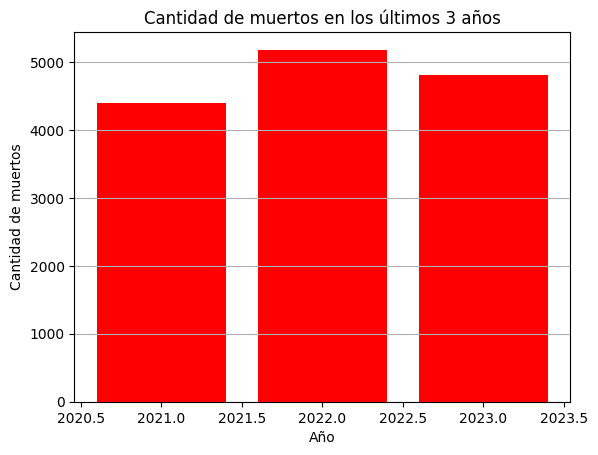

In [59]:
anios = [2021, 2022, 2023]

if all(anio in numMuertos for anio in anios):
    plt.bar(anios, [numMuertos[anio] for anio in anios], color="red")
    plt.title('Cantidad de muertos en los últimos 3 años')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de muertos')
    plt.grid(axis='y')

    plt.show()
else:
    print("Error: Datos de muertos no disponibles para todos los años.")


### DISPERSION

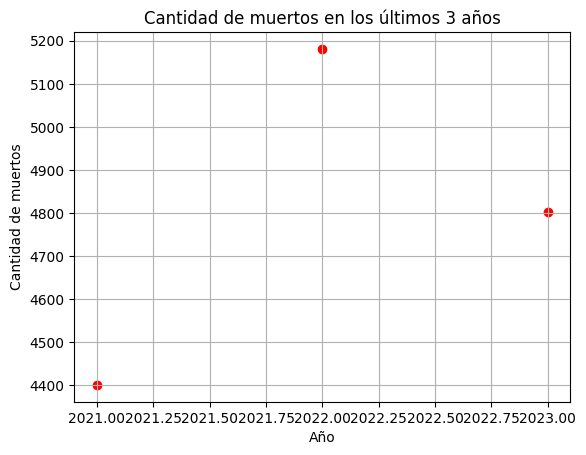

In [63]:
anios = [2021, 2022, 2023]

if all(anio in numMuertos for anio in anios):
    plt.scatter(anios, [numMuertos[anio] for anio in anios], color="red")
    plt.title('Cantidad de muertos en los últimos 3 años')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de muertos')
    plt.grid(True)
    plt.show()
else:
    print("Error: Datos de muertos no disponibles para todos los años.")

### LINEAS

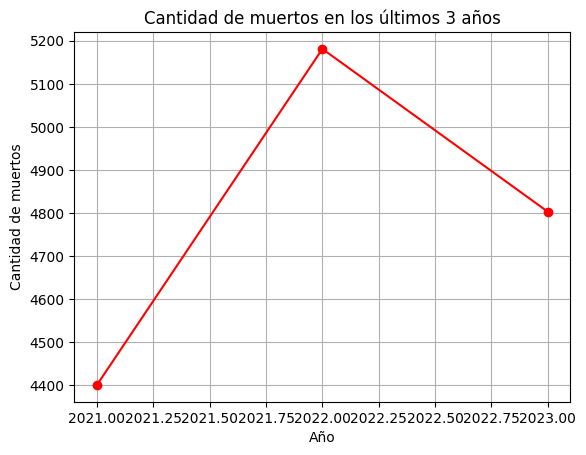

In [62]:
import matplotlib.pyplot as plt

anios = [2021, 2022, 2023]
if all(anio in numMuertos for anio in anios):
    plt.plot(anios, [numMuertos[anio] for anio in anios], marker='o', color='red', linestyle='-')
    plt.title('Cantidad de muertos en los últimos 3 años')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de muertos')
    plt.grid()
    plt.show()
else:
    print("Error: Datos de muertos no disponibles para todos los años.")
